In [22]:
import sqlite3 as sql3
import matplotlib.pyplot as plt

In [ ]:
class geracoes:
    def __init__(self):
        
        conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = conexao.cursor()
        self.geracoes= self.cursor.execute('SELECT count(id) FROM generation;').fetchone()[0]
    def gens(self):
        qtd = self.cursor.execute('SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE;').fetchone()[0]  # Fetch count value properly
        
        pk_generacion = []
        

        for x in range(1,self.geracoes+1):
            consulta=self.cursor.execute(f"SELECT id FROM generation where Generation=={x};").fetchone()[0]
            # Count the number of Pokémon for each generation
            linha = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Generation = {consulta}").fetchone()[0]

            if linha:  # Verifica se há algum resultado
                # Calculate the percentage of Pokémon in this generation
                porcentagem = (linha / qtd) * 100
                pk_generacion.append(porcentagem)

        return pk_generacion
    def lendarios(self):
        lend_generacion = []
        qtd = self.cursor.execute('SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE;').fetchone()[0]  # Fetch count value properly
        for x in range(1,self.geracoes+1):
            consulta=self.cursor.execute(f"SELECT id FROM generation where Generation=={x};").fetchone()[0]
            # Executa a consulta SQL e calcula a porcentagem
            linha = self.cursor.execute(f"SELECT COUNT(*) LENGENDARYS FROM pokemon WHERE Generation=={consulta} and Legendary==TRUE").fetchone()[0]
            if linha:  # Verifica se há algum resultado
                # Calcula a porcentagem do valor POKEMONS
                porcentagem = (linha / qtd) * 100
                lend_generacion.append(porcentagem)  # Adiciona a porcentagem à lista
        return lend_generacion
    def lends_per_generation(self):
        lista = []
        for x in range(1,self.geracoes+1):
            consulta=self.cursor.execute(f"SELECT id FROM generation where Generation=={x};").fetchone()[0]
            # Contando o total de Pokémon em cada geração
            linha = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Generation = {consulta};").fetchone()[0]
            qtd = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE AND Generation = {consulta};").fetchone()[0]
            if linha > 0:
                lista.append((qtd / linha) * 100)
            else:
                lista.append(0)  # Adiciona 0% se não houver Pokémon na geração
        return lista
    def mega(self):
        mega_generacion = []
        qtd = self.cursor.execute('SELECT COUNT(*) FROM Mega;').fetchone()[0]  # Fetch count value properly
        for x in range(self.geracoes+1):
            # Executa a consulta SQL e calcula a porcentagem
            linha = self.cursor.execute(f"SELECT Count(*) FROM pokemon, WHERE pokemon.fieldID=Mega.foreignkey and Generation=={x};").fetchone()[0]
            if linha:  # Verifica se há algum resultado
                # Calcula a porcentagem do valor POKEMONS
                porcentagem = (linha / qtd) * 100
                mega_generacion.append(porcentagem)  # Adiciona a porcentagem à lista
        return mega_generacion

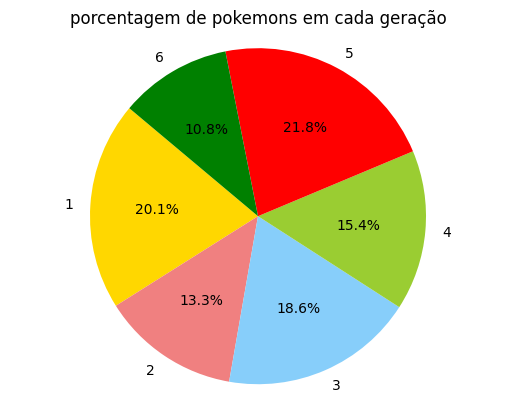

In [24]:
geracao=geracoes()
labels = [str(x) for x in range(1,len(geracao.gens())+1)]
sizes = [int(x) for x in geracao.gens()]  # Porcentagens
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen','red','green']  # Cores para cada fatia

# Criando o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('porcentagem de pokemons em cada geração')
# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()

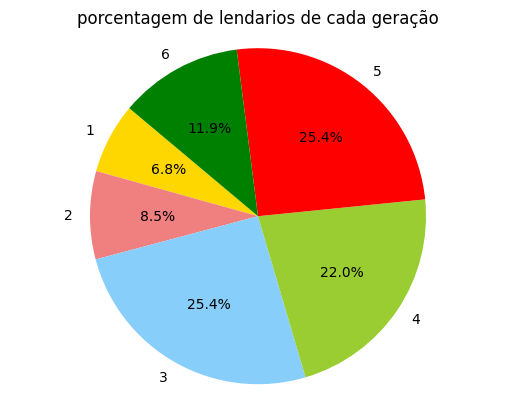

In [25]:
labels = ['1', '2', '3', '4','5','6']
sizes = [x for x in geracao.lendarios()]  # Porcentagens
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen','red','green']  # Cores para cada fatia

# Criando o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('porcentagem de lendarios de cada geração')
# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()

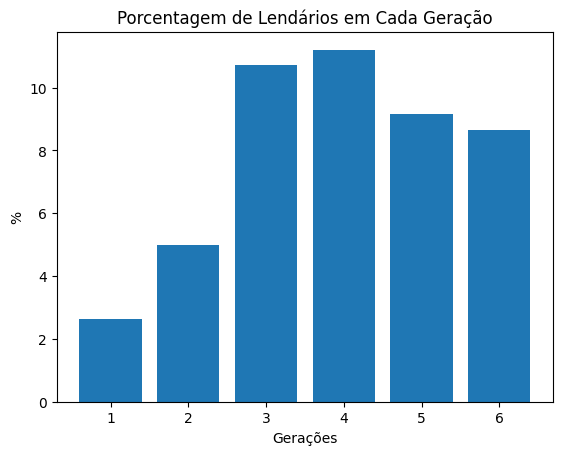

In [26]:
geracao = geracoes()

# Obter os dados para o gráfico
consulta = geracao.lends_per_generation()

# Gerar as categorias (nomes das gerações)
categorias = [str(x+1) for x in range(len(consulta))]

# Criar gráfico de barras
plt.bar(categorias, consulta)

# Adicionar título e rótulos aos eixos
plt.title('Porcentagem de Lendários em Cada Geração')
plt.xlabel('Gerações')
plt.ylabel('%')

# Mostrar o gráfico
plt.show()

In [ ]:
print(geracoes().mega())